## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import re,nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Loading the datasets

In [3]:
train_df = pd.read_csv("/content/train.csv", encoding='latin1')
test_df = pd.read_csv("/content/test.csv", encoding='latin1')
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


## Feature engineering

In [4]:
train_df = train_df[["text", 'sentiment', 'Time of Tweet', 'Age of User', 'Country']]
test_df = test_df[["text", 'sentiment', 'Time of Tweet', 'Age of User', 'Country']]

## Data preprocessing
- Removing all the null values
- Explicit type conversion of data to String

In [5]:
train_df = train_df.dropna()
test_df = test_df.dropna()

train_df['text'] = train_df['text'].astype(str)
test_df['text'] = test_df['text'].astype(str)

<ipython-input-5-a6719619d5e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'] = train_df['text'].astype(str)
<ipython-input-5-a6719619d5e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['text'] = test_df['text'].astype(str)


- Cleaning the Strings

In [6]:
stop_word=set(stopwords.words('english'))
st=PorterStemmer()

def clear_text(text):
    text=str(text).lower()
    text=re.sub('<.*>','',text)
    text=re.sub('http\S+|https\S+|www\S+','',text)
    text=re.sub('@\S+|#\S+','',text)
    text=re.sub('[^\w\s]','',text)
    tokens=word_tokenize(text)
    tokens=[token for token in tokens if token not in stop_word]
    tokens=[st.stem(token) for token in tokens]
    return ' '.join(tokens)

In [7]:
train_df['text'] = train_df['text'].fillna('').apply(clear_text)
test_df['text'] = test_df['text'].fillna('').apply(clear_text)

## Text Vectorization of the strings

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(max_features=10000)
xtrain=vec.fit_transform(train_df['text']).toarray()
xtest=vec.transform(test_df['text']).toarray()

In [9]:
ytrain=train_df['sentiment']
ytest=test_df['sentiment']

## Dynamic Function

In [10]:
def model_eval(model):

    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)

    print(f'Accuracy Score: {accuracy_score(ytest,ypred)}')

    print(f'Classification Report:')
    print(classification_report(ytest,ypred))

    print(f'Confusion Matrix:')
    cm=confusion_matrix(ytest,ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy Score is : 0.7099603848330504
Classification_report
              precision    recall  f1-score   support

    negative       0.73      0.65      0.69      1001
     neutral       0.65      0.75      0.69      1430
    positive       0.80      0.71      0.75      1103

    accuracy                           0.71      3534
   macro avg       0.73      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534

Confusion Matrix


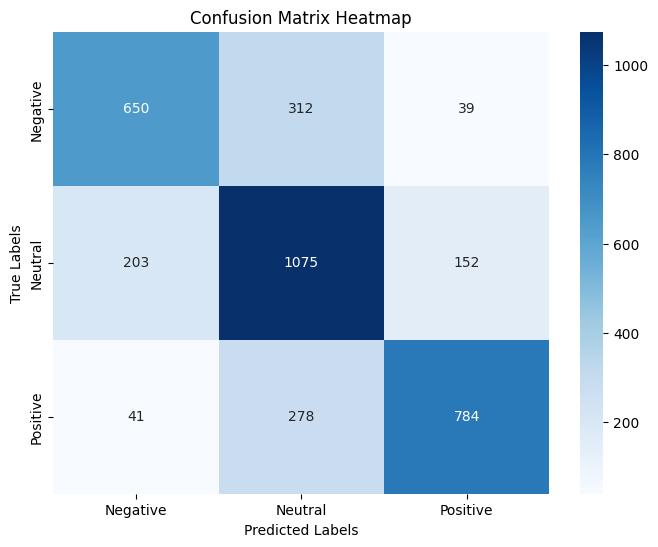

In [ ]:
model_eval(LogisticRegression(max_iter=500))

Accuracy Score is : 0.48500282965478214
Classification_report
              precision    recall  f1-score   support

    negative       0.69      0.17      0.27      1001
     neutral       0.44      0.92      0.60      1430
    positive       0.77      0.21      0.33      1103

    accuracy                           0.49      3534
   macro avg       0.63      0.43      0.40      3534
weighted avg       0.61      0.49      0.42      3534

Confusion Matrix


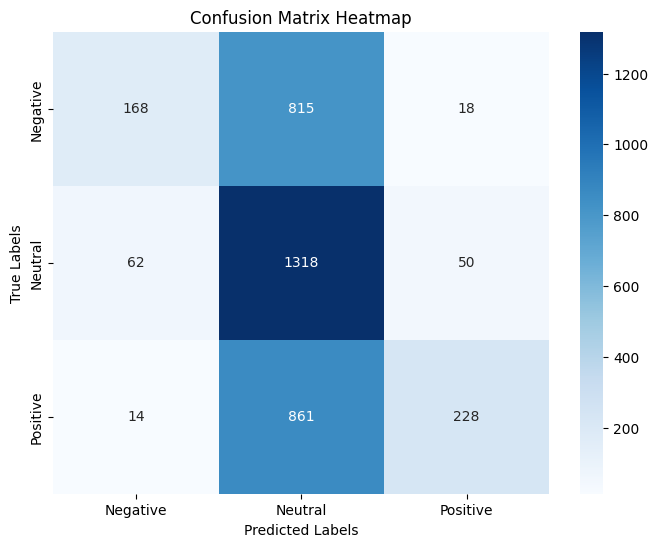

In [ ]:
model_eval(KNeighborsClassifier())

Accuracy Score is : 0.7082625919637804
Classification_report
              precision    recall  f1-score   support

    negative       0.72      0.65      0.68      1001
     neutral       0.66      0.71      0.68      1430
    positive       0.77      0.76      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.71      3534
weighted avg       0.71      0.71      0.71      3534

Confusion Matrix


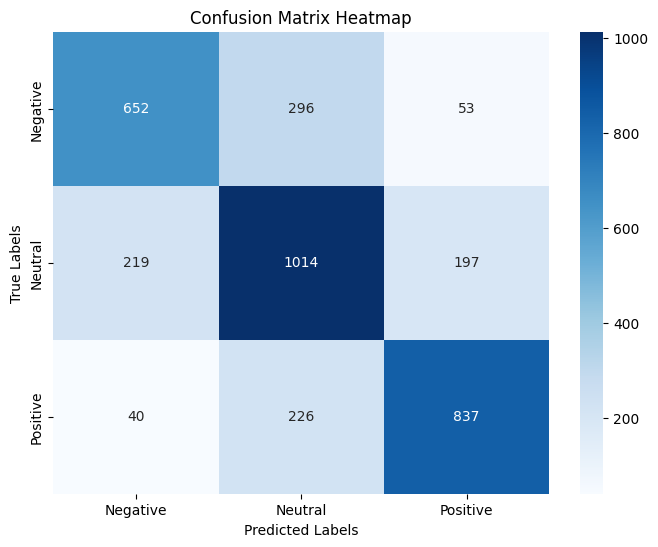

In [11]:
model_eval(RandomForestClassifier())

Accuracy Score: 0.6411997736276174
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.49      0.59      1001
     neutral       0.56      0.79      0.65      1430
    positive       0.77      0.59      0.67      1103

    accuracy                           0.64      3534
   macro avg       0.69      0.62      0.64      3534
weighted avg       0.67      0.64      0.64      3534

Confusion Matrix:


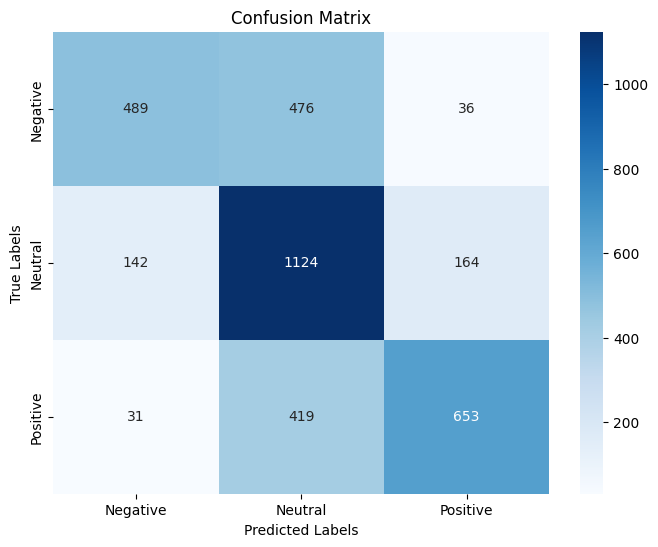

In [14]:
model_eval(MultinomialNB())

## Artificial Neural Network
- label encoding


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
y_train_encoded=lb.fit_transform(ytrain)
y_train_encoded = to_categorical(y_train_encoded)
y_train_encoded

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

## Model building

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(448, activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(xtrain,
          y_train_encoded,
          epochs=5,
          batch_size=32,
          validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.5669 - loss: 0.8989 - val_accuracy: 0.6892 - val_loss: 0.7365
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 66s 93ms/step - accuracy: 0.8060 - loss: 0.5096 - val_accuracy: 0.6761 - val_loss: 0.8064
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 76s 84ms/step - accuracy: 0.9088 - loss: 0.2546 - val_accuracy: 0.6670 - val_loss: 1.0116
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9648 - loss: 0.1079 - val_accuracy: 0.6548 - val_loss: 1.3676
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9836 - loss: 0.0512 - val_accuracy: 0.6630 - val_loss: 1.7017


## Evaluation of the test dataset

In [18]:
y_test_encoded=lb.transform(ytest)
y_test_encoded = to_categorical(y_test_encoded)

test_loss, test_acc = model.evaluate(xtest, y_test_encoded)
print("Neural Network Test Accuracy:", test_acc)

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6744 - loss: 1.6177
Neural Network Test Accuracy: 0.6697793006896973
